# *Organización de datos 75.06/ 95.58*

#  Trabajo práctico 1

# Análisis exploratorio de datos 

**Segundo cuatrimestre del 2020**

Compu_Datos

Apellido y nombre    | Padrón

Alejandro Balladares | 101118

Gabriel Alexander Arbieto Benites | 102219

Nicolas Nieva | 101067

Omar Fernandez 81006

# 1 Introducción

El objetivo principal del análisis exploratorio de datos permite comprender las mejor las características de un conjunto de datos. Es imprescindible detectar patrones, relaciones, tendencias, valores comunes, valores atípicos que nos permitan comprender la naturaleza de estos.  Para esto se requieren herramientas que nos permita visualizar,  analizar y formular hipótesis.

# 2. Analisis general
En esta sección se realizará la importación del set  datos, un muestreo preliminar, estructura y datos faltantes. 

## 2.1 Importación de datos y análisis preliminar
Se dispone de un archivo csv que nos brinda información sobre distintos tweets. Cada línea del archivo nos da información sobre un tweet en particular. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluida en el archivo. Para ello usando el método head()  mostramos los primeros cinco registros.

In [184]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (20, 10)


In [185]:
df = pd.read_csv('train.csv')
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

## 2.2 Datos faltantes en el Dataframe

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

###  2.2.1 Datos faltantes por columna

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos

In [187]:
columnas = ['ID','Region','Territory', 'Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved',
            'Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
            'Bureaucratic_Code','Account_Created_Date',
            #'Source',
            'Billing_Country', 'Account_Name',
            'Opportunity_Name', 'Opportunity_ID', 'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
            'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms', 'Opportunity_Created_Date',
            'Brand', 'Product_Type','Size', 'Product_Category_B', 'Price','Currency','Last_Activity',
            'Quote_Expiry_Date','Last_Modified_Date','Last_Modified_By','Product_Family','Product_Name',
            'ASP_Currency','ASP','ASP_(converted)_Currency','ASP_(converted)','Planned_Delivery_Start_Date',
            'Planned_Delivery_End_Date','Month','Delivery_Quarter','Delivery_Year','Actual_Delivery_Date',
            'TRF','Total_Amount_Currency','Total_Amount', 'Total_Taxable_Amount_Currency','Total_Taxable_Amount',
            'Stage','Prod_Category_A']

nulls = pd.DataFrame(df[columnas].isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls = nulls.reset_index()
nulls = nulls.nlargest(10, 'nulls')
nulls
#puse 10 porque de la totalidad de las columnas, solo 3 tienen nulls, si quieren mostrar el resto, pueden hacerlo
#No hay muchos nulls pero la columna "Price" está llena de valores "None" cuando deberían ser numeros, anda a saber
#si las otras columnas tienen problemas similares

,index,nulls,porcentaje
49,ASP,3209,18.94
50,ASP_(converted),3209,18.94
48,Total_Amount,59,0.35
0,ID,0,0.00
1,Price,0,0.00
2,Currency,0,0.00
3,Last_Activity,0,0.00
4,Quote_Expiry_Date,0,0.00
5,Last_Modified_Date,0,0.00
6,Last_Modified_By,0,0.00


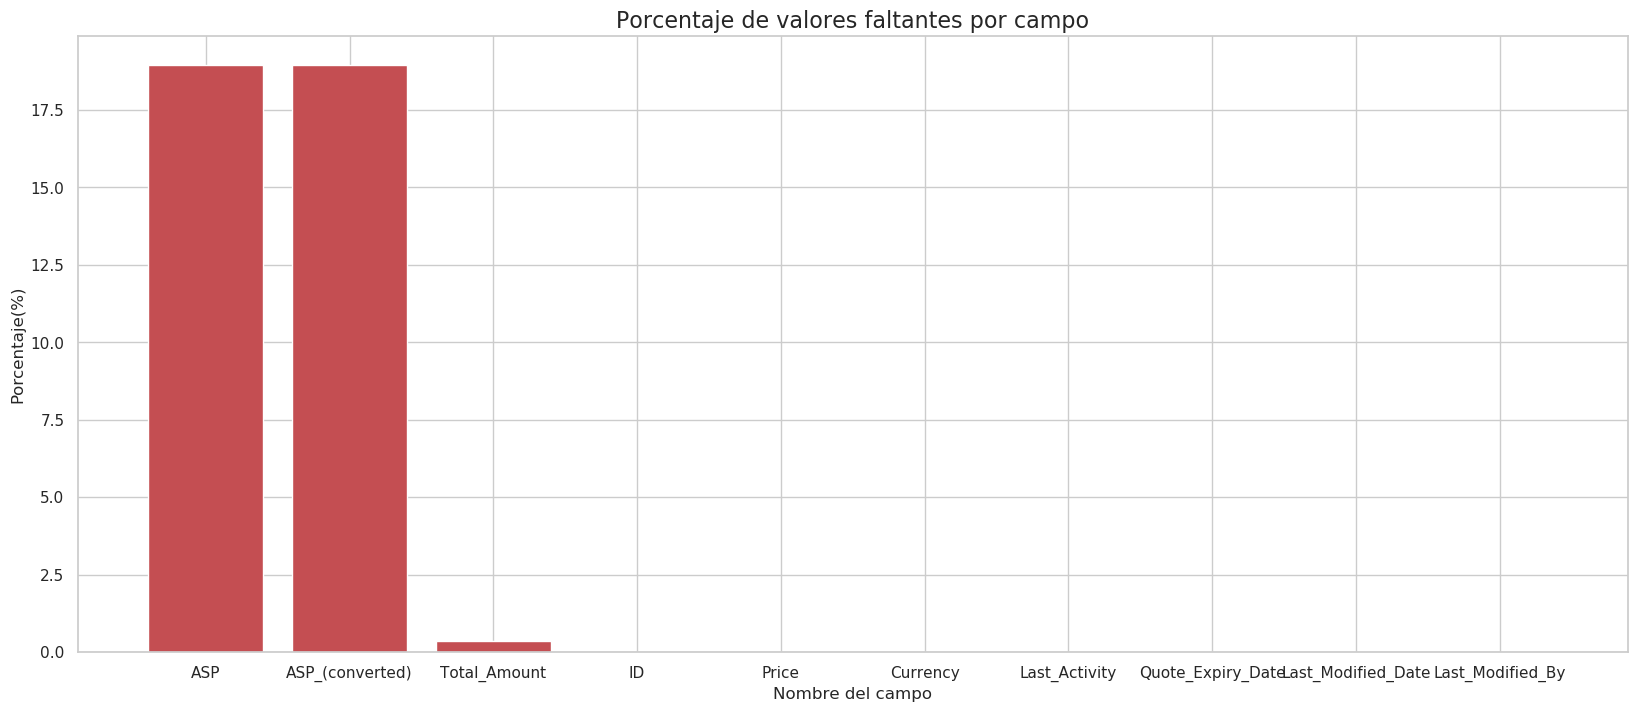

In [188]:
# Tamaño
plt.figure(figsize=(20,8))
# Título
plt.title('Porcentaje de valores faltantes por campo', fontsize=16)
# Eje X
plt.xlabel('Nombre del campo')
# Eje Y
plt.ylabel('Porcentaje(%)')
plt.bar(height=nulls["porcentaje"], x=nulls["index"], color='C3')

plt.show()

## Analisis de región

Descripción

Text(0, 0.5, 'Cantidad de apariciones')

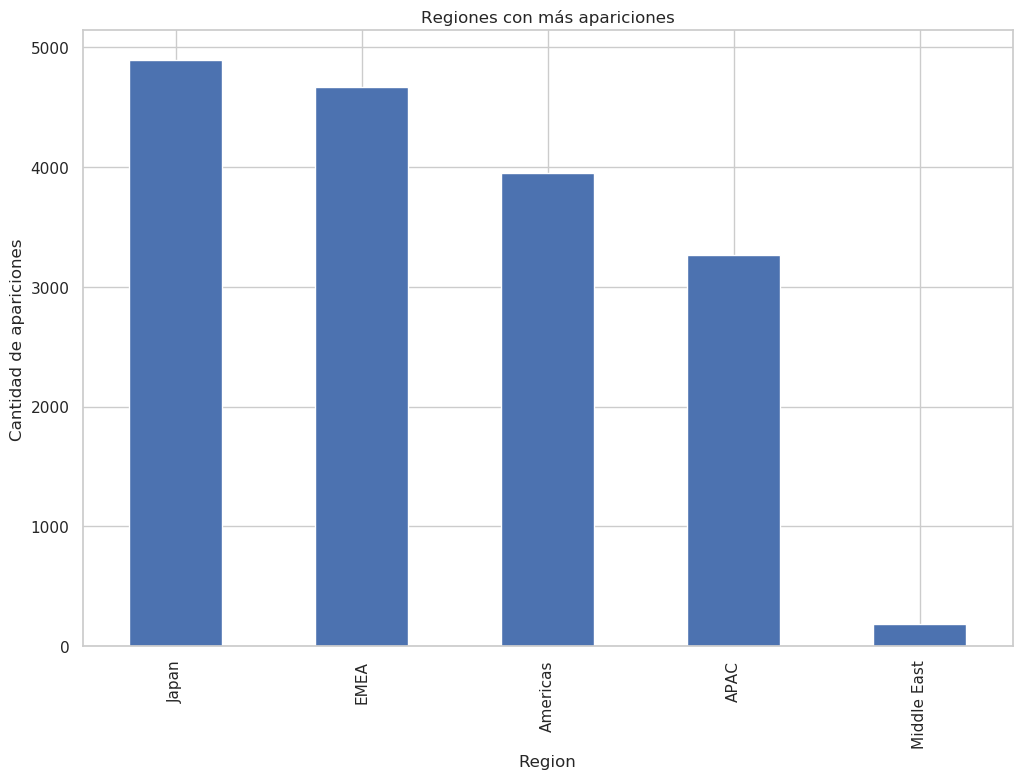

In [189]:
region = pd.DataFrame(df['Region'].value_counts())
region.columns = ['cantidad']

region["cantidad"].plot(kind="bar",title = 'Regiones con más apariciones' , figsize=(12,8))
plt.xlabel('Region', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

<Figure size 100x100 with 0 Axes>

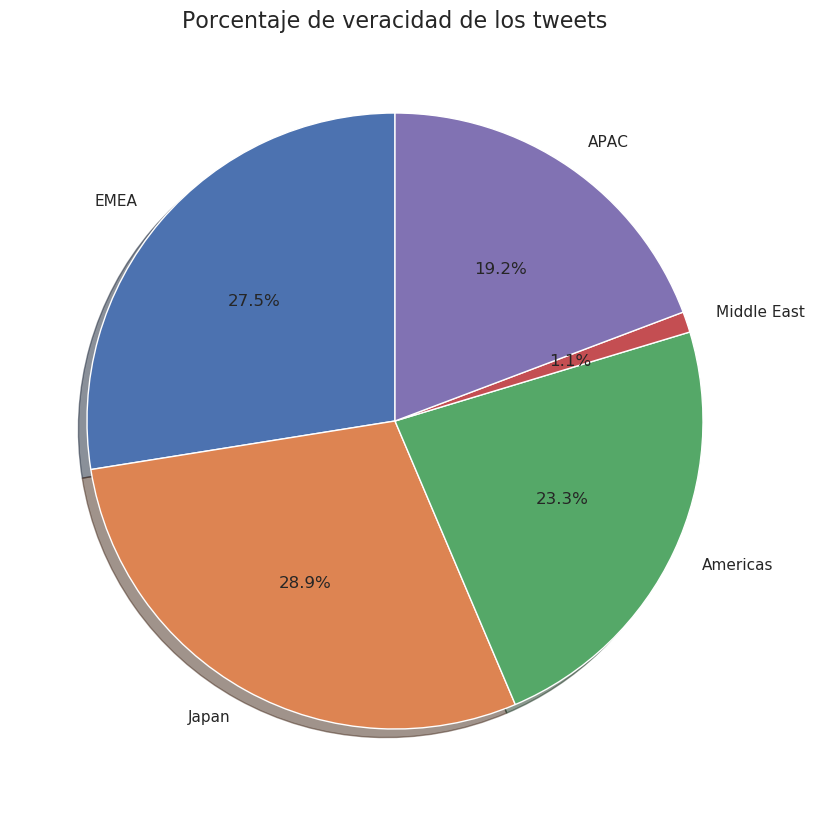

In [190]:
emea = df[df['Region'] == 'EMEA']
americas = df[df['Region'] == 'Americas']
apac = df[df['Region'] == 'APAC']
japan = df[df['Region'] == 'Japan']
me = df[df['Region'] == 'Middle East']

cant_emea = emea['Region'].count()
cant_americas = americas['Region'].count()
cant_japan = japan['Region'].count()
cant_me = me['Region'].count()
cant_apac = apac['Region'].count()

# Tamaño
plt.figure(figsize=(1,1))
fig1, ax1 = plt.subplots()
ax1.pie([cant_emea, cant_japan, cant_americas, cant_me, cant_apac], labels=['EMEA',
                'Japan','Americas','Middle East','APAC'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Porcentaje de veracidad de los tweets", fontsize=16)
plt.show()

EMEA = Europa, oriente medio y Africa.

pero por otro lado también tenemos a oriente medio por separado

## Analisis del territorio

Deescripción

Text(0, 0.5, 'Cantidad de apariciones')

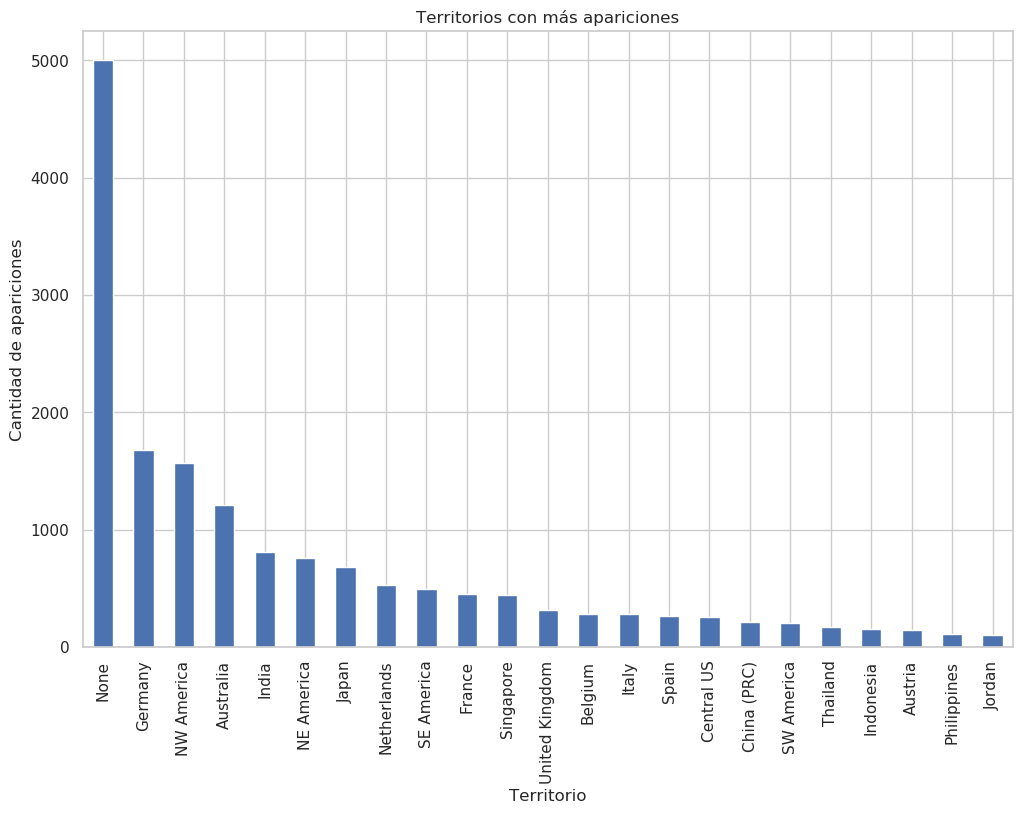

In [191]:
territory = pd.DataFrame(df['Territory'].value_counts())
territory.columns = ['cantidad']

territory_filtradas = territory.loc[(territory.cantidad > 100)] #Numero a elección
territory_filtradas["cantidad"].plot(kind="bar",title = 'Territorios con más apariciones' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

Hay demasiados con 'None', hacemos lo mismo pero le quitamos ese valor.

Text(0, 0.5, 'Cantidad de apariciones')

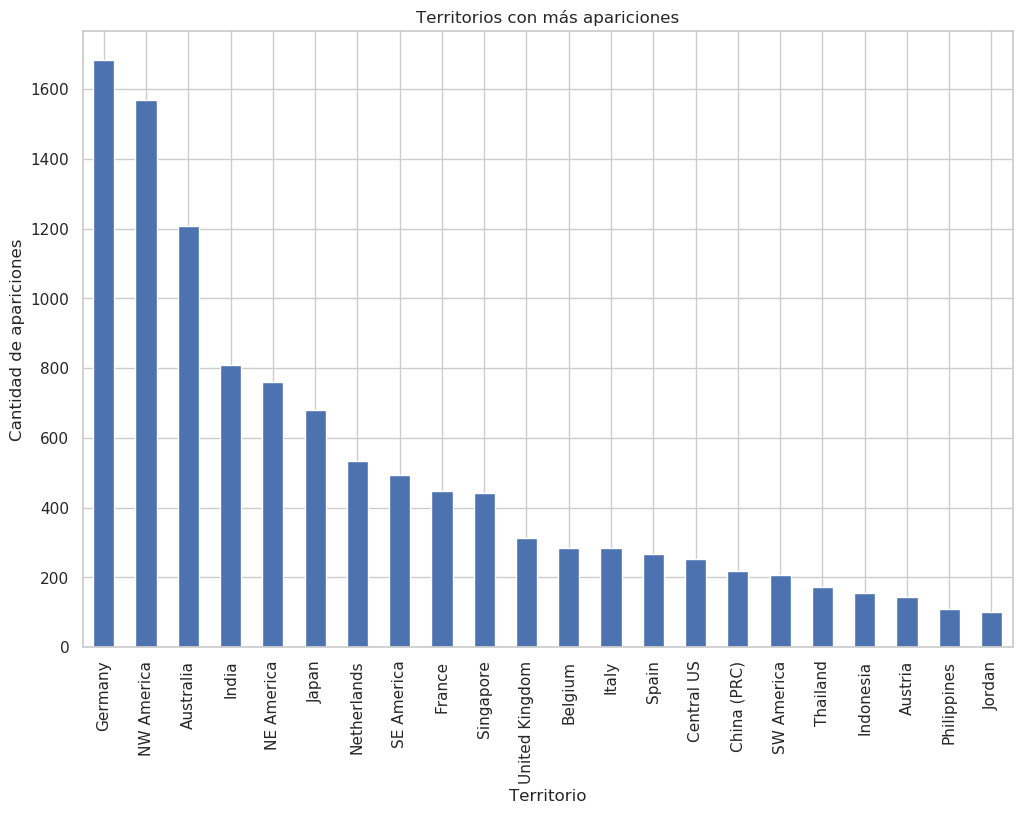

In [192]:
aux = df.loc[df.Territory != 'None']
territory = pd.DataFrame(aux['Territory'].value_counts())
territory.columns = ['cantidad']

territory_filtradas = territory.loc[(territory.cantidad > 100)] #Numero a elección
territory_filtradas["cantidad"].plot(kind="bar",title = 'Territorios con más apariciones' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)


Descripción y analisis

## Analisis del país donde se emite la factura

Descripción

Text(0, 0.5, 'Cantidad de apariciones')

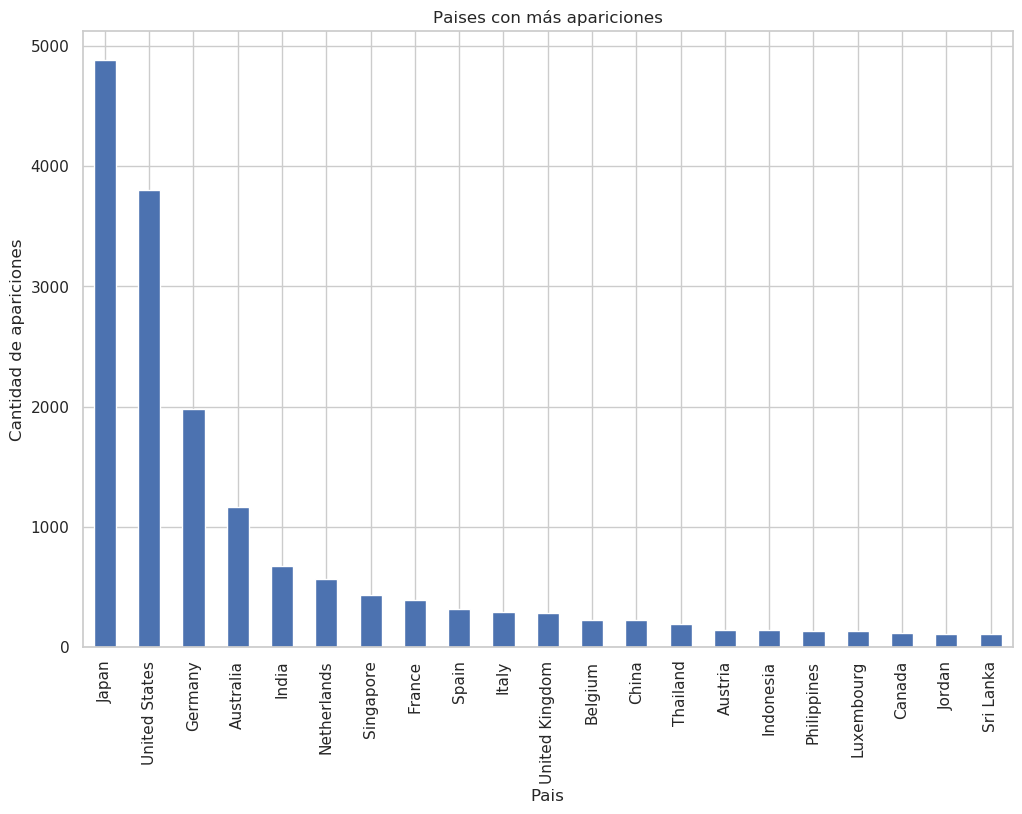

In [193]:
#df['Billing_Country'].value_counts()

country = pd.DataFrame(df['Billing_Country'].value_counts())
country.columns = ['cantidad']

country_filtradas = country.loc[(country.cantidad > 100)] #Numero a elección
country_filtradas["cantidad"].plot(kind="bar",title = 'Paises con más apariciones' , figsize=(12,8))
plt.xlabel('Pais', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

In [194]:
#df = df['Account_Created_Date'].astype()

columna = pd.to_datetime(df['Account_Created_Date'],dayfirst = True)

df['Account_Created_Date'] = columna
df['Account_Created_Date'].value_counts()

2015-04-20    3011
2013-07-27    2641
2013-09-23     587
2014-09-19     397
2015-12-21     355
2013-07-28     291
2013-03-10     267
2013-08-22     259
2016-09-28     236
2016-01-29     215
2016-03-03     150
2013-05-09     135
2015-10-30     117
2016-04-18      96
2017-02-20      92
2015-06-17      91
2015-04-21      91
2014-02-28      89
2015-12-17      86
2016-11-07      84
2013-10-29      76
2015-03-07      76
2016-05-20      75
2015-03-30      75
2015-06-16      75
2016-07-01      74
2016-04-03      73
2017-05-07      72
2017-07-12      72
2014-12-06      71
              ... 
2017-08-08       1
2016-02-24       1
2017-09-19       1
2017-11-04       1
2014-12-02       1
2018-02-13       1
2016-12-02       1
2014-08-11       1
2018-12-13       1
2015-01-21       1
2017-09-29       1
2018-05-10       1
2016-08-08       1
2017-06-20       1
2016-08-15       1
2016-10-12       1
2018-11-15       1
2018-05-11       1
2018-03-01       1
2015-10-12       1
2018-12-12       1
2018-01-25  

In [195]:
df['Opportunity_Created_Date'].value_counts()

6/30/2017     124
1/22/2016     107
5/9/2017      104
5/18/2016      99
1/7/2016       89
1/30/2018      87
10/2/2017      86
4/20/2017      83
12/6/2017      82
3/15/2017      80
10/24/2017     80
5/15/2017      77
2/15/2016      76
1/6/2016       74
5/2/2017       73
5/4/2018       72
12/8/2017      72
11/9/2017      69
12/12/2016     69
7/12/2016      68
12/13/2017     65
7/8/2017       65
6/29/2017      64
2/1/2018       64
4/7/2016       63
12/6/2016      62
1/4/2018       60
3/10/2016      60
9/7/2017       60
11/15/2017     59
             ... 
6/11/2016       1
9/4/2015        1
10/6/2014       1
1/23/2016       1
8/15/2015       1
9/19/2015       1
12/13/2014      1
4/1/2015        1
10/21/2018      1
2/18/2018       1
10/24/2015      1
12/29/2015      1
8/5/2014        1
6/7/2018        1
5/12/2018       1
8/21/2015       1
9/23/2015       1
7/22/2018       1
3/26/2016       1
5/13/2018       1
11/20/2015      1
10/1/2016       1
11/23/2015      1
6/25/2015       1
11/20/2016

In [196]:
df['Quote_Type'].value_counts()

Non Binding    16777
Binding          170
Name: Quote_Type, dtype: int64

In [197]:
df['Account_Owner'].value_counts()

Person_Name_50    3730
Person_Name_13    1328
Person_Name_8     1286
Person_Name_43    1241
Person_Name_18    1093
Person_Name_3      875
Person_Name_32     682
Person_Name_4      664
Person_Name_65     631
Person_Name_64     577
Person_Name_16     439
Person_Name_46     381
Person_Name_45     357
Person_Name_2      333
Person_Name_38     326
Person_Name_42     304
Person_Name_66     258
Person_Name_60     227
Person_Name_59     201
Person_Name_49     201
Person_Name_62     179
Person_Name_54     178
Person_Name_52     172
Person_Name_21     166
Person_Name_5      166
Person_Name_55     138
Person_Name_63     138
Person_Name_51     108
Person_Name_39     104
Person_Name_33      86
Person_Name_14      74
Person_Name_61      72
Person_Name_44      57
Person_Name_41      51
Person_Name_9       50
Person_Name_58      15
Person_Name_26      12
Person_Name_11      10
Person_Name_29       8
Person_Name_36       7
Person_Name_25       7
Person_Name_23       4
Person_Name_34       3
Person_Name

In [198]:
df['Brand'].value_counts()

None        15911
Other         607
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Brand_13       17
Brand_7        17
Brand_21       17
Brand_20       10
Brand_23       10
Brand_27        5
Brand_17        5
Brand_2         4
Brand_4         4
Brand_0         4
Brand_12        3
Brand_16        2
Brand_19        1
Brand_3         1
Brand_6         1
Brand_26        1
Brand_1         1
Name: Brand, dtype: int64

In [199]:
df['Size'].value_counts()

None      15967
Other       394
Size_3      356
Size_4      196
Size_1       25
Size_0        7
Size_2        2
Name: Size, dtype: int64

In [200]:
df['Price'].value_counts()

None     15982
Other      609
0.24        27
0.41        22
0.28        20
0.27        18
0.29        17
0.32        15
0.38        14
0.35        14
0.23        13
0.33        12
0.42        12
0.3         11
0.34        11
0.26        11
0.31        10
0.245        8
0.305        7
0.25         7
0.39         6
0.45         6
0.47         6
0.325        6
0.335        6
0.225        6
0.22         6
0.2          5
0.36         4
0.285        4
0.275        4
0.37         4
0.445        4
0.355        3
0.265        3
0.255        3
0.295        3
0.56         2
0.345        2
0.505        2
0.375        2
0.52         2
0.4          2
0.44         2
0.49         2
0.48         2
0.215        2
0.235        2
0.315        2
0.21         1
0.365        1
0.55         1
0.465        1
Name: Price, dtype: int64

In [201]:
df['Currency'].value_counts()

None    16052
EUR       475
USD       420
Name: Currency, dtype: int64

In [202]:
df['Last_Activity'].value_counts() #columna vacia?

NaT    16947
Name: Last_Activity, dtype: int64

In [203]:
df['Quote_Expiry_Date'].value_counts()

NaT           4625
6/30/2017      436
3/31/2017      363
9/30/2017      225
12/31/2016     200
10/31/2017     171
1/31/2018      163
11/30/2017     156
12/31/2017     156
5/31/2017      153
8/31/2017      145
7/31/2017      139
5/31/2018      115
9/30/2016      111
7/31/2018      103
11/30/2018     102
6/30/2016      102
8/31/2018       92
4/30/2018       92
4/28/2017       90
6/29/2018       82
3/31/2016       77
2/28/2018       76
11/30/2016      74
10/31/2018      72
3/30/2018       68
10/31/2016      62
12/31/2018      62
11/10/2017      61
12/30/2016      60
              ... 
9/10/2016        1
2/3/2016         1
4/18/2016        1
12/16/2017       1
2/10/2016        1
1/11/2019        1
11/15/2015       1
1/4/2019         1
2/18/2017        1
3/26/2018        1
9/19/2016        1
2/16/2016        1
6/13/2018        1
12/5/2018        1
2/17/2018        1
5/21/2017        1
9/26/2018        1
8/6/2018         1
7/1/2018         1
3/17/2018        1
4/9/2017         1
4/3/2016    

In [204]:
df['Actual_Delivery_Date'].value_counts() #vacia

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [205]:
df['TRF'].value_counts()

0      11971
1       2192
2        627
3        354
5        297
4        208
10       190
6        131
7        111
20        83
11        58
8         54
12        48
30        43
13        40
25        38
15        35
9         31
14        30
17        29
19        25
50        22
28        19
18        19
60        17
40        17
23        12
35        12
26        11
27        10
       ...  
94         2
52         2
68         2
102        2
87         1
81         1
429        1
61         1
69         1
96         1
128        1
160        1
250        1
122        1
270        1
500        1
105        1
103        1
73         1
111        1
132        1
39         1
84         1
98         1
248        1
51         1
167        1
163        1
195        1
165        1
Name: TRF, Length: 101, dtype: int64

In [206]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [209]:
#aux = df.groupby('Region')['Stage']

aux = df.groupby(['Region','Stage']).agg({'Stage': 'count'})
aux.columns = ['cantidad']
aux

cantidad
Region      Stage                  
APAC        Closed Lost        1355
            Closed Won         1896
            Proposal              8
            Qualification         3
Americas    Closed Lost        2140
            Closed Won         1793
            Negotiation           8
            Proposal              4
EMEA        Closed Lost        2189
            Closed Won         2471
            Negotiation           1
            Proposal              3
Japan       Closed Lost        1546
            Closed Won         3323
            Negotiation           1
            Proposal             14
            Qualification         8
Middle East Closed Lost         120
            Closed Won           50
            Negotiation           8
            Proposal              6